In [1]:
# Coursera IBM Course - Data Visualization with Python

# Lab 3

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read xlsx file - install xlrd module first

# Dataset from: https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp# 
df_can = pd.read_excel("Canada.xlsx",
                    sheet_name="Canada by Citizenship",
                    skiprows=range(20),
                    skipfooter=2)

In [3]:
# Remove unnecessary columns
df_can.drop(['AREA','REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head(2)

# Rename columns
df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns.values

# Adding a "Total" column that sums up the total immigrants by country

df_can["Total"]=df_can.sum(axis=1)

# Set "Country" as index 

df_can.set_index("Country", inplace=True)

# Create a list with "years" - useful for plotting
years = list(map(str, range(1980,2014)))

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [5]:
df_can.shape

(195, 38)

# Visualizing Data

In [4]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use(['ggplot'])

In [7]:
# Pie Charts

# kind="pie"

# Task: use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

In [5]:
# Gathering data using groupby method and sum() function

df_continents = df_can.groupby("Continent", axis=0).sum()

# output of a groupby method is a "groupby" object, 
# it cannot be used for further analysis unless a function is applied

print(type(df_can.groupby('Continent', axis=0).sum()))
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


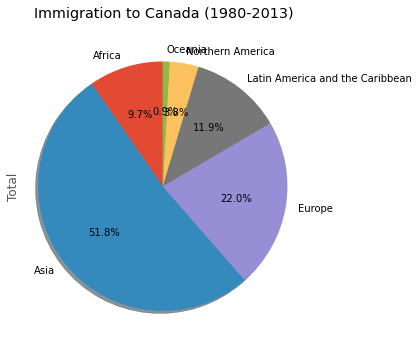

In [6]:
df_continents["Total"].plot(kind="pie",
                           figsize=(5,6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,) 
# autopct: %1.1f%% -> 2.5%; %1.2f%% -> 2.55%; %1.3f%% -> 2.555%

plt.title("Immigration to Canada (1980-2013)")
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis("equal")

plt.show()

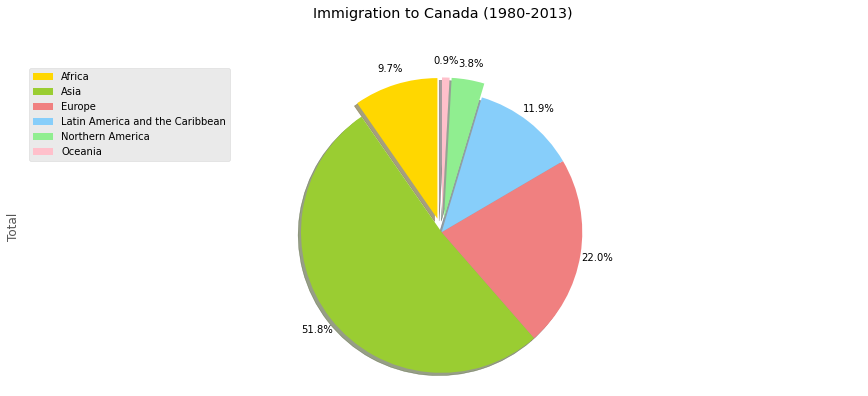

In [7]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents["Total"].plot(kind="pie",
                           figsize=(15,6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           colors=colors_list,
                           explode=explode_list) 

# pctdistance - The ratio between the center of each pie slice and the start of the text generated by autopct.
# a ration between the centre and numeric description

# y = 1.12 - scale up the title by 12% to match pctdistance
plt.title("Immigration to Canada (1980-2013)", y=1.12)
plt.axis("equal")

plt.legend(labels=df_continents.index, loc="upper left")

plt.show()

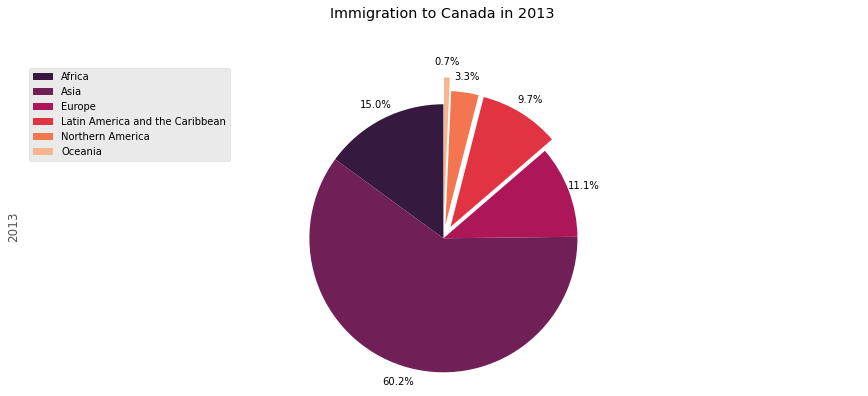

In [9]:
# Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

import seaborn as sns

colors_list = sns.color_palette("rocket")
# colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2]

# change all columns to string type
# all(isinstance(column, str) for column in df_can.columns) must be True

df_continents.columns = list(map(str, df_continents.columns))

df_continents["2013"].plot(kind="pie",
                           figsize=(15,6),
                           autopct='%1.1f%%',
                           startangle=90,
                           labels=None,
                           pctdistance=1.12,
                           colors=colors_list,
                           explode=explode_list) 

# pctdistance - The ratio between the center of each pie slice and the start of the text generated by autopct.
# a ration between the centre and numeric description

# y = 1.12 - scale up the title by 12% to match pctdistance
plt.title("Immigration to Canada in 2013", y=1.12)
plt.axis("equal")

plt.legend(labels=df_continents.index, loc="upper left")

plt.show()

In [25]:
# Box plots 
# represent the distribution of the data in five main dimensions:

# Minimun: Smallest number in the dataset excluding the outliers.
# First quartile: Middle number between the minimum and the median.
# Second quartile (Median): Middle number of the (sorted) dataset.
# Third quartile: Middle number between median and maximum.
# Maximum: Highest number in the dataset excluding the outliers.

# kind = "box"

# Task: Japanese immigrants between 1980 - 2013

In [10]:
# to get a dataframe, place extra square brackets around 'Japan'
df_can.columns = list(map(str, df_can.columns))
japan = df_can.loc[["Japan"], years].transpose()
japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


<function matplotlib.pyplot.show(*args, **kw)>

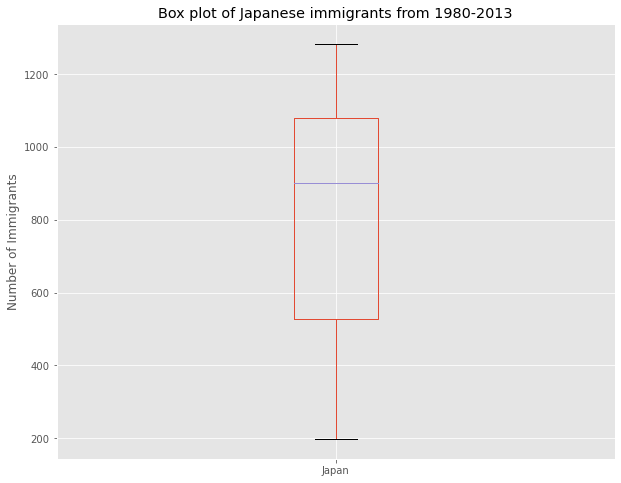

In [11]:
japan.plot(kind="box", figsize=(10,8))

plt.title("Box plot of Japanese immigrants from 1980-2013")
plt.ylabel("Number of Immigrants")

plt.show

In [12]:
# minimum number of immigrants: ca. 200
# maximum number of immigrants: ca. 1300
# median: 900
# First quartile (25%) = 25% of the years (1980-2013, 33 years -> ca. 8 years) had an annual count of around 500 or fewer
# Third quartile (75%) = 75% of the years (1980-2013, 33 years -> ca. 25 years) had an annual count of around 1100 or fewer

japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [13]:
# Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013

df_CI = df_can.loc[["China", "India"], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


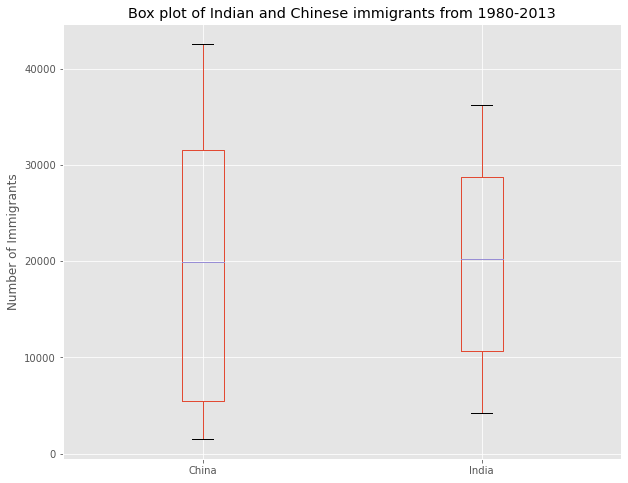

In [14]:
df_CI.plot(kind="box", figsize=(10,8))

plt.title("Box plot of Indian and Chinese immigrants from 1980-2013")
plt.ylabel("Number of Immigrants")

plt.show()

In [32]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


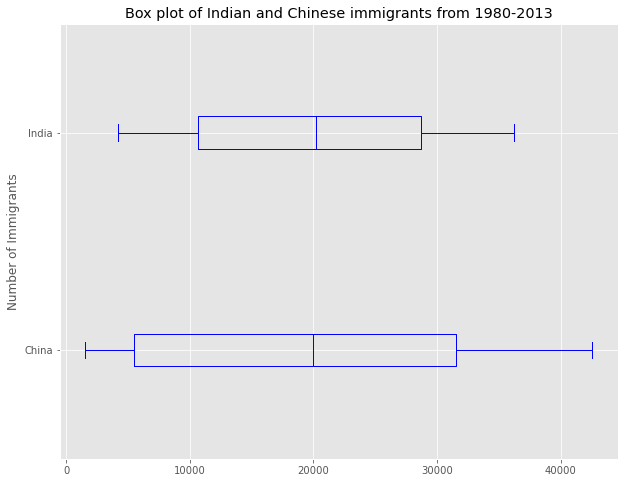

In [15]:
df_CI.plot(kind="box", figsize=(10,8), color="blue", vert=False)

plt.title("Box plot of Indian and Chinese immigrants from 1980-2013")
plt.ylabel("Number of Immigrants")

plt.show()

In [34]:
# Subplots

# fig = plt.figure() # create figure
# ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
# plot number starts at 1!


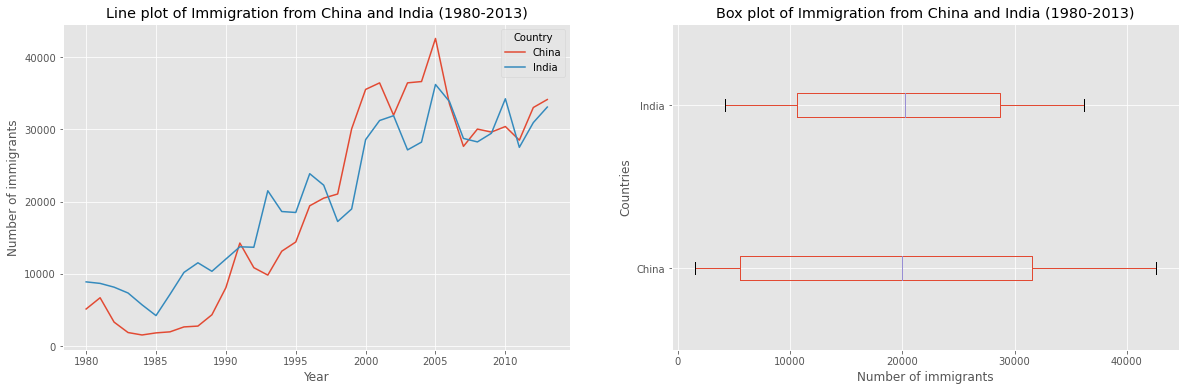

In [16]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)


# Subplot 1: Line plot

df_CI.plot(kind="line", figsize=(20,6), ax=ax0)

ax0.set_title("Line plot of Immigration from China and India (1980-2013)")
ax0.set_xlabel("Year")
ax0.set_ylabel("Number of immigrants")

# Subplot 2: Box plot

df_CI.plot(kind="box", figsize=(20,6), vert=False, ax=ax1)

ax1.set_title("Box plot of Immigration from China and India (1980-2013)")
ax1.set_ylabel("Countries")
ax1.set_xlabel("Number of immigrants")

plt.show()



In [42]:
# Task: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s

In [17]:
# Select top 15 countries based on total immigrant population

df_can.sort_values(by = "Total", ascending=False, axis=0, inplace=True)
# top15 = df_can.sort_values(["Total"], ascending=False, axis=0).head(15)

In [18]:
top15 = df_can.head(15)
top15.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [19]:
#create a list of all years in decade
years_80s = list(map(str, range(1980,1990)))
years_90s = list(map(str, range(1990,2000)))
years_00s = list(map(str, range(2000,2010)))

#slice the original dataframe df_can to create a series for each decade
df_80s = top15.loc[:, years_80s].sum(axis=1)
df_90s = top15.loc[:, years_90s].sum(axis=1)
df_00s = top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})

new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [51]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


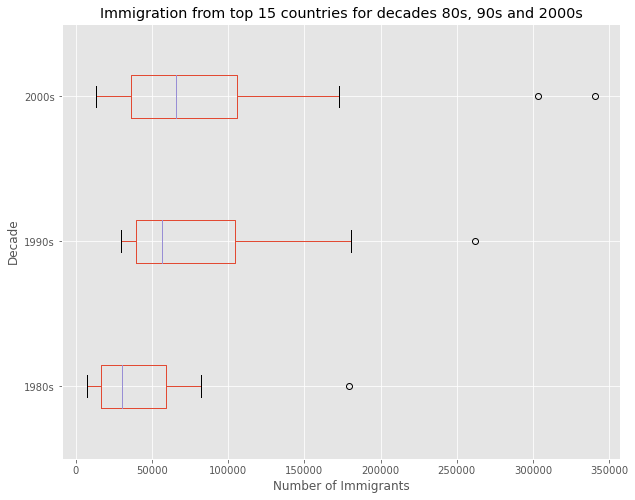

In [20]:
new_df.plot(kind="box", figsize=(10,8), vert=False)

plt.title("Immigration from top 15 countries for decades 80s, 90s and 2000s")
plt.xlabel("Number of Immigrants")
plt.ylabel("Decade")

plt.show()

In [21]:
# Note how the box plot differs from the summary table created. 
# The box plot scans the data and identifies the outliers. 
# In order to be an outlier, the data value must be:

    # larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
    # smaller than Q1 by at least 1.5 times the IQR.

# Let's look at decade 2000s as an example:

    # Q1 (25%) = 36,101.5
    # Q3 (75%) = 105,505.5
    # IQR = Q3 - Q1 = 69,404

# Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

# Outlier > 105,505.5 + (1.5 * 69,404)
# Outlier > 209,611.5


In [22]:
# Task: let's check how many entries fall above the outlier threshold 

mask = new_df["2000s"] > 209611.5
new_df[mask]

# Sample solution:
# new_df=new_df.reset_index()
# new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


In [57]:
# Scatter plots

# Task: visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013

In [27]:
# Get the dataset. 
# Since we are expecting to use the relationship betewen years and total 
# population, we will convert years to int type.

# Calculate the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# axis=0 -> sum for each column 
# axis=1 -> sum for each row

# Change years to type int
df_tot.index = map(int, df_tot.index)

# reset index to put in back in as a column
df_tot.reset_index(inplace = True)

# rename, columns
df_tot.columns = ["year", "total"]

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


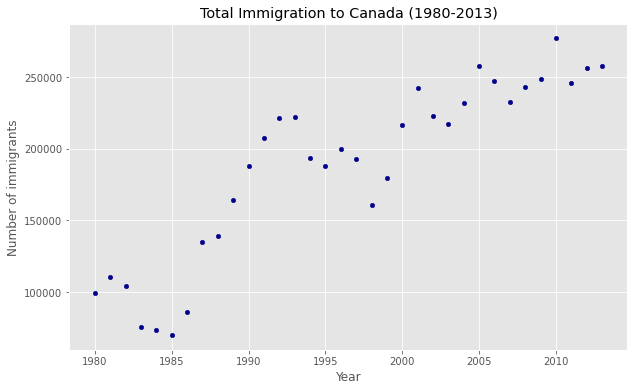

In [28]:
# Plot data

df_tot.plot(kind="scatter", x="year", y="total", figsize=(10,6), color="darkblue")

plt.title("Total Immigration to Canada (1980-2013)")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")

plt.show()

In [29]:
# Linear line of best fit
# np.polyfit()

x = df_tot["year"]
y = df_tot["total"]
fit = np.polyfit(x,y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

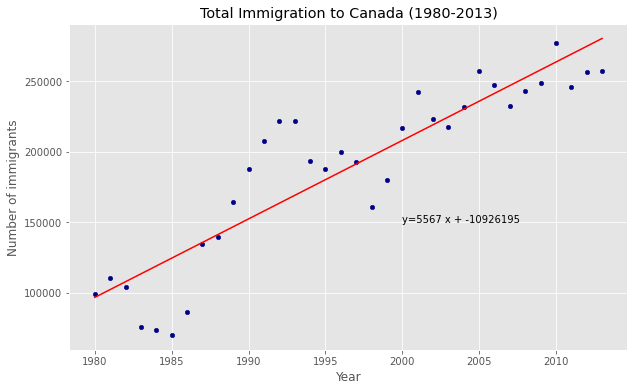

'No. Immigrants = 5567 * Year + -10926195'

In [32]:
# slope = 5.56709228e+03, intersect = -1.09261952e+07
# function y_hat = -1.09261952e+07 + 5.56709228e+03 * x

# Plot the regression line on the scatter plot

df_tot.plot(kind="scatter", x="year", y="total", figsize=(10,6), color="darkblue")

plt.title("Total Immigration to Canada (1980-2013)")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")

plt.plot(x, fit[0]*x + fit[1], color="red")
### ???
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

In [35]:
# Other way to solve it (after: towardsdatascience.com)

x = df_tot["year"]
y = df_tot["total"]
fit = np.polyfit(x,y, deg=1)
# function that does the fitting
f = np.poly1d(fit)

# insert new column with y_hat
df_tot.insert(2, "y_hat", f(df_tot["year"]))


df_tot.head()

,year,total,y_hat
0,1980,99137,96647.477311
1,1981,110563,102214.569595
2,1982,104271,107781.661879
3,1983,75550,113348.754163
4,1984,73417,118915.846448


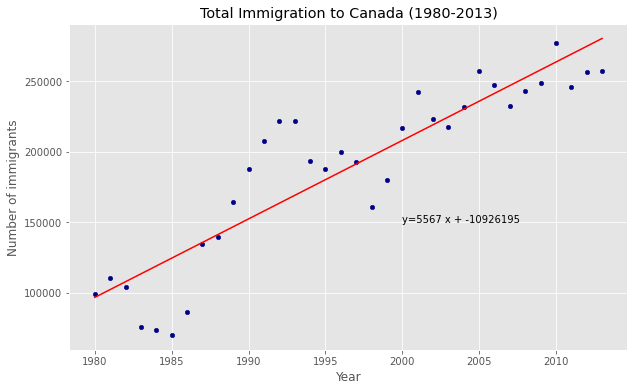

'No. Immigrants = 5567 * Year + -10926195'

In [37]:
# Plot the regression line on the scatter plot

df_tot.plot(kind="scatter", x="year", y="total", figsize=(10,6), color="darkblue")

plt.title("Total Immigration to Canada (1980-2013)")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")

plt.plot(x, df_tot["y_hat"], color="red")
### ???
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

In [38]:
# Task: Create a scatter plot of the total immigration from Denmark, Norway and Sweden to Canada from 1980 to 2013

df_countries = df_can.loc[["Denmark", "Norway", "Sweden"], years].transpose()
df_countries.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [48]:
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.head()

,0
1980,669
1981,678
1982,627
1983,333
1984,252


In [51]:
df_total.index = map(int, df_total.index)

# reset index to put in back in as a column
df_total.reset_index(inplace = True)

# rename, columns
df_total.columns = ["year", "total"]

df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


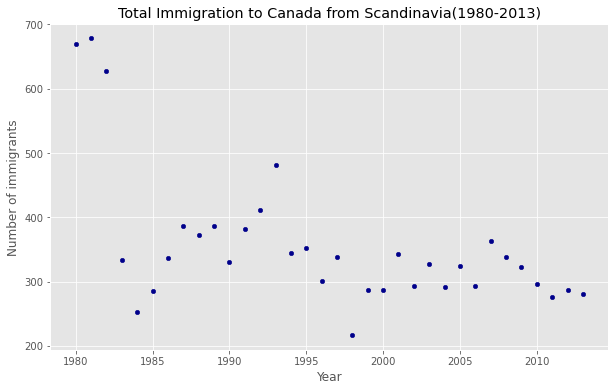

In [52]:
df_total.plot(kind="scatter", x="year", y="total", figsize=(10,6), color="darkblue" )

plt.title("Total Immigration to Canada from Scandinavia(1980-2013)")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")

plt.show()

In [53]:
# Bubble plots

# Task: Analyze the effect of Argentina's great depression (1998-2002) and compare it's immigration to that of Brazil

In [57]:
# Get the data for Brazil and Argentina

df_BA = df_can.loc[["Brazil", "Argentina"], years].transpose()

# Convert the index to type int
df_BA.index = map(int, df_BA.index)

# Label the index
df_BA.index.name = "Year"

# Reset index to bring Year as a column
df_BA.reset_index(inplace=True)

df_BA.head()

Country,Year,Brazil,Argentina
0,1980,211,368
1,1981,220,426
2,1982,192,626
3,1983,139,241
4,1984,145,237


In [58]:
#  Create the normalized weights using min-max normalization

# X' = (X-min(X))/(max(X)-min(X))

# normalized data Brazil
norm_brazil = (df_BA["Brazil"] - df_BA["Brazil"].min()) / (df_BA["Brazil"].max() - df_BA["Brazil"].min())

# normalized data Argentina
norm_arg = (df_BA["Argentina"] - df_BA["Argentina"].min()) / (df_BA["Argentina"].max() - df_BA["Argentina"].min())

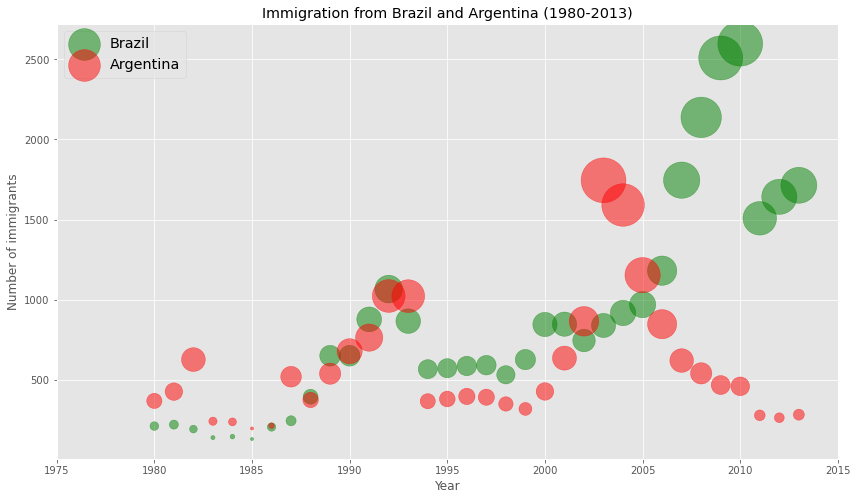

In [59]:
# Plot the data

ax0 = df_BA.plot(kind="scatter",
                x="Year",
                y="Brazil",
                figsize=(14,8),
                alpha=0.5,
                color="green",
                s=norm_brazil * 2000 + 10,
                xlim=(1975,2015))

ax1 = df_BA.plot(kind="scatter",
                x="Year",
                y="Argentina",
                figsize=(14,8),
                alpha=0.5,
                color="red",
                s=norm_arg * 2000 + 10,
                ax=ax0)

ax0.set_title("Immigration from Brazil and Argentina (1980-2013)")
ax0.set_ylabel("Number of immigrants")
ax0.legend(["Brazil", "Argentina"], loc="upper left", fontsize="x-large")

In [60]:
# The size of the bubble corresponds to the magnitude of immigrating 
# population for that year, compared to the 1980 - 2013 data. 
# The larger the bubble, the more immigrants in that year.

In [61]:
# Task: Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. 

In [63]:
# Get the data for China and India

df_CI = df_can.loc[["China", "India"], years].transpose()

# Convert the index to type int
df_CI.index = map(int, df_CI.index)

# Label the index
df_CI.index.name = "Year"

# Reset index to bring Year as a column
df_CI.reset_index(inplace=True)

df_CI.head()

Country,Year,China,India
0,1980,5123,8880
1,1981,6682,8670
2,1982,3308,8147
3,1983,1863,7338
4,1984,1527,5704


In [64]:
# Normalize data

# normalized data China
norm_china = (df_CI["China"] - df_CI["China"].min()) / (df_CI["China"].max() - df_CI["China"].min())

# normalized data India
norm_india = (df_CI["India"] - df_CI["India"].min()) / (df_CI["India"].max() - df_CI["India"].min())


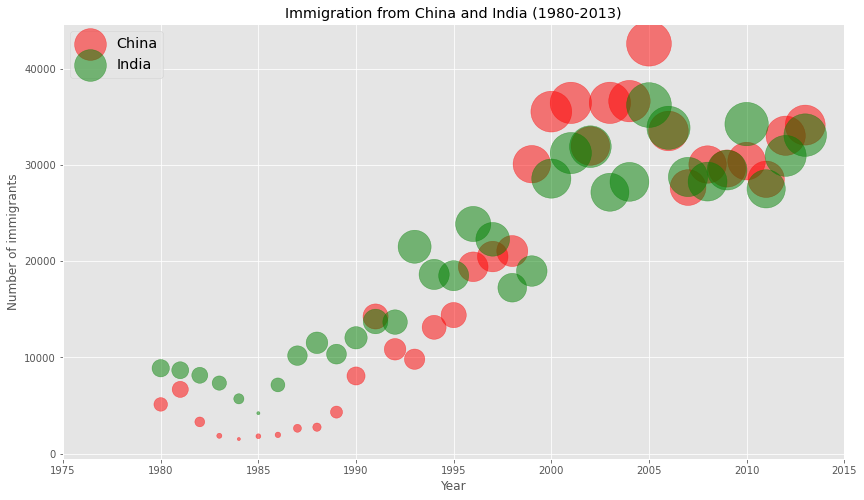

In [72]:
# Plot the data

ax0 = df_CI.plot(kind="scatter",
                x="Year",
                y="China",
                figsize=(14,8),
                alpha=0.5,
                color="red",
                s=norm_china * 2000 + 10,
                xlim=(1975,2015))

ax1 = df_CI.plot(kind="scatter",
                x="Year",
                y="India",
                figsize=(14,8),
                alpha=0.5,
                color="green",
                s=norm_india * 2000 + 10,
                ax=ax0)

ax0.set_title("Immigration from China and India (1980-2013)")
ax0.set_ylabel("Number of immigrants")
ax0.legend(["China", "India"], loc="upper left", fontsize="x-large")